<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 13 | Regressão II | Exercício 1
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [74]:
import numpy as np
import pandas as pd

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

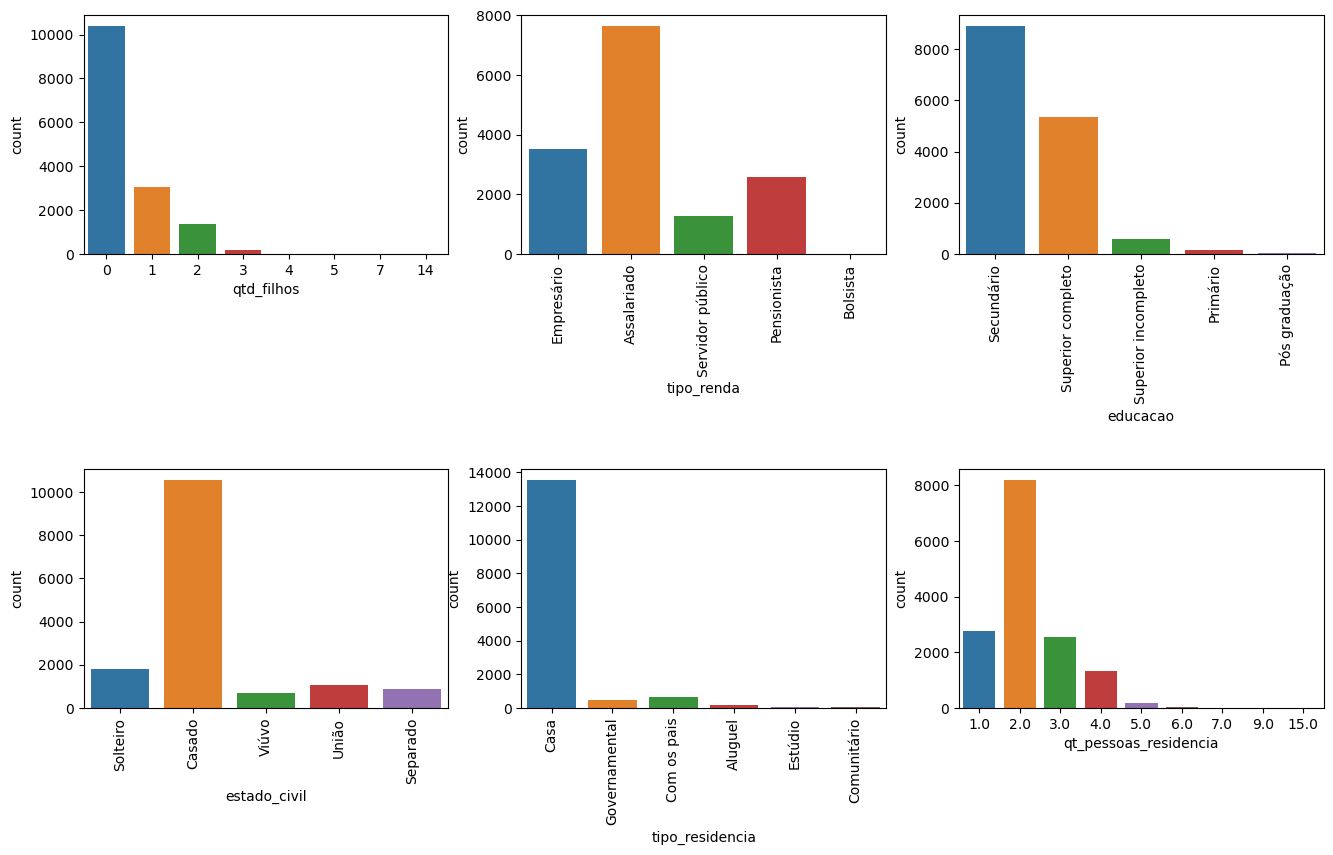

In [68]:
#1

fig, axes = plt.subplots(2,3)
fig.subplots_adjust(hspace=0.9)
plt.rc('figure', figsize=(16,9))


ax1 = sns.countplot(ax = axes[0,0], x='qtd_filhos', data=df)
ax2 = sns.countplot(ax = axes[0,1], x='tipo_renda', data=df)
ax3 = sns.countplot(ax = axes[0,2], x='educacao', data=df)
ax4 = sns.countplot(ax = axes[1,0], x='estado_civil', data=df)
ax5 = sns.countplot(ax = axes[1,1], x='tipo_residencia', data=df)
ax6 = sns.countplot(ax = axes[1,2], x='qt_pessoas_residencia', data=df)

ax2.tick_params(axis="x", rotation = 90)
ax3.tick_params(axis="x", rotation = 90)
ax4.tick_params(axis="x", rotation = 90)
ax5.tick_params(axis="x", rotation = 90)

In [76]:
y, X = patsy.dmatrices('''np.log(renda) ~ sexo 
                        + posse_de_veiculo 
                        + posse_de_imovel 
                        + C(qtd_filhos, Treatment(0))
                        + C(tipo_renda, Treatment('Assalariado'))
                        + C(educacao, Treatment('Secundário')) 
                        + C(estado_civil, Treatment('Casado')) 
                        + C(tipo_residencia, Treatment('Casa')) 
                        + idade 
                        + tempo_emprego 
                        + C(qt_pessoas_residencia, Treatment(2))
                        ''', 
                        data=df)

In [78]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     203.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:43:15   Log-Likelihood:                -13559.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12392   BIC:                         2.745e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7.0932      0.039    183.905      0.000       7.018       7.169
sexo[T.M]                                                       0.7878      0.015     53.664      0.000       0.759       0.817
posse_de_veiculo[T.True]                                        0.0436      0.014      3.079      0.002       0.016       0.071
posse_de_imovel[T.True]                                         0.0828      0.014      5.907      0.000       0.055       0.110
C(qtd_filhos, Treatment(0))[T.1]                               -0.2501      0.112     -2.239      0.025      -0.469      -0.031
C(qtd_filhos, Treatment(0))[T.2]                               -0.5697      0.223     -2.559      0.011      -1.006      -0.133
C(qtd_filhos, Treatment(0))[T.3]                               -0.5560      0.486     -1.144      0.253      -1.509       0.397
C(qtd_filhos, Treatment(0))[T.4]                                0.2091      0.429      0.488      0.626      -0.631       1.049
C(qtd_filhos, Treatment(0))[T.5]                                0.1385      0.410      0.338      0.736      -0.666       0.943
C(qtd_filhos, Treatment(0))[T.7]                                0.0221      0.162      0.137      0.891      -0.295       0.339
C(qtd_filhos, Treatment(0))[T.14]                              -0.4630      0.261     -1.772      0.076      -0.975       0.049
C(tipo_renda, Treatment('Assalariado'))[T.Bolsista]             0.2259      0.241      0.937      0.349      -0.247       0.699
C(tipo_renda, Treatment('Assalariado'))[T.Empresário]           0.1547      0.015     10.359      0.000       0.125       0.184
C(tipo_renda, Treatment('Assalariado'))[T.Pensionista]         -0.2891      0.243     -1.190      0.234      -0.765       0.187
C(tipo_renda, Treatment('Assalariado'))[T.Servidor público]     0.0551      0.022      2.476      0.013       0.011       0.099
C(educacao, Treatment('Secundário'))[T.Primário]                0.0130      0.072      0.181      0.856      -0.128       0.154
C(educacao, Treatment('Secundário'))[T.Pós graduação]           0.1168      0.142      0.821      0.412      -0.162       0.396
C(educacao, Treatment('Secundário'))[T.Superior completo]       0.1069      0.014      7.678      0.000       0.080       0.134
C(educacao, Treatment('Secundário'))[T.Superior incompleto]    -0.0290      0.032     -0.897      0.370      -0.092       0.034
C(estado_civil, Treatment('Casado'))[T.Separado]                0.3176      0.112      2.831      0.005       0.098       0.537
C(estado_civil, Treatment('Casado'))[T.Solteiro]                0.2556      0.110      2.319      0.020       0.040       0.472
C(estado_ci

In [104]:
#2

y, X = patsy.dmatrices('''np.log(renda) ~ sexo 
                        + posse_de_veiculo 
                        + posse_de_imovel 
                        + C(qtd_filhos == 1)
                        + C(qtd_filhos == 2)
                        + C(tipo_renda == 'Empresário')
                        + C(tipo_renda == 'Servidor público')
                        + C(educacao == 'Superior completo') 
                        + C(estado_civil, Treatment('Casado')) 
                        + idade 
                        + tempo_emprego 
                        + C(qt_pessoas_residencia == 1)
                        + C(qt_pessoas_residencia == 3)
                        + C(qt_pessoas_residencia == 4)
                        ''', 
                        data=df)

In [105]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     406.1
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:03:49   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.717e+04
Df Residuals:                   12409   BIC:                         2.731e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            7.0903      0.037    192.988      0.000       7.018       7.162
sexo[T.M]                                            0.7881      0.015     53.883      0.000       0.759       0.817
posse_de_veiculo[T.True]                             0.0438      0.014      3.103      0.002       0.016       0.072
posse_de_imovel[T.True]                              0.0822      0.014      5.989      0.000       0.055       0.109
C(qtd_filhos == 1)[T.True]                          -0.1465      0.085     -1.723      0.085      -0.313       0.020
C(qtd_filhos == 2)[T.True]                          -0.3760      0.164     -2.287      0.022      -0.698      -0.054
C(tipo_renda == 'Empresário')[T.True]                0.1551      0.015     10.420      0.000       0.126       0.184
C(tipo_renda == 'Servidor público')[T.True]          0.0572      0.022      2.577      0.010       0.014       0.101
C(educacao == 'Superior completo')[T.True]           0.1078      0.014      7.940      0.000       0.081       0.134
C(estado_civil, Treatment('Casado'))[T.Separado]     0.2163      0.085      2.537      0.011       0.049       0.383
C(estado_civil, Treatment('Casado'))[T.Solteiro]     0.1560      0.084      1.867      0.062      -0.008       0.320
C(estado_civil, Treatment('Casado'))[T.União]       -0.0338      0.025     -1.342      0.180      -0.083       0.016
C(estado_civil, Treatment('Casado'))[T.Viúvo]        0.2523      0.093      2.727      0.006       0.071       0.434
C(qt_pessoas_residencia == 1)[T.True]               -0.1718      0.084     -2.049      0.040      -0.336      -0.007
C(qt_pessoas_residencia == 3)[T.True]                0.1968      0.086      2.300      0.021       0.029       0.364
C(qt_pessoas_residencia == 4)[T.True]                0.4612      0.165      2.796      0.005       0.138       0.784
idade                                                0.0057      0.001      7.170      0.000       0.004       0.007
tempo_emprego                                        0.0616      0.001     59.332      0.000       0.060       0.064
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.122
Skew:                           0.022   Prob(JB):                        0.571
Kurtosis:                       3.013   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This mi

In [114]:
#3
##Removendo União e Casado

y, X = patsy.dmatrices('''np.log(renda) ~ sexo 
                        + posse_de_veiculo 
                        + posse_de_imovel 
                        + C(qtd_filhos == 1)
                        + C(qtd_filhos == 2)
                        + C(tipo_renda == 'Empresário')
                        + C(tipo_renda == 'Servidor público')
                        + C(educacao == 'Superior completo') 
                        + C(estado_civil == 'Separado') 
                        + C(estado_civil == 'Solteiro')
                        + C(estado_civil == 'Viúvo')
                        + idade 
                        + tempo_emprego 
                        + C(qt_pessoas_residencia == 1)
                        + C(qt_pessoas_residencia == 3)
                        + C(qt_pessoas_residencia == 4)
                        ''', 
                        data=df)

In [115]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     431.3
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:07:41   Log-Likelihood:                -13569.
No. Observations:               12427   AIC:                         2.717e+04
Df Residuals:                   12410   BIC:                         2.730e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.0832      0.036    194.855      0.000       7.012       7.154
sexo[T.M]                                       0.7888      0.015     53.973      0.000       0.760       0.817
posse_de_veiculo[T.True]                        0.0452      0.014      3.205      0.001       0.018       0.073
posse_de_imovel[T.True]                         0.0825      0.014      6.017      0.000       0.056       0.109
C(qtd_filhos == 1)[T.True]                     -0.1468      0.085     -1.727      0.084      -0.314       0.020
C(qtd_filhos == 2)[T.True]                     -0.3758      0.164     -2.286      0.022      -0.698      -0.054
C(tipo_renda == 'Empresário')[T.True]           0.1545      0.015     10.382      0.000       0.125       0.184
C(tipo_renda == 'Servidor público')[T.True]     0.0573      0.022      2.582      0.010       0.014       0.101
C(educacao == 'Superior completo')[T.True]      0.1081      0.014      7.959      0.000       0.081       0.135
C(estado_civil == 'Separado')[T.True]           0.2202      0.085      2.584      0.010       0.053       0.387
C(estado_civil == 'Solteiro')[T.True]           0.1600      0.083      1.917      0.055      -0.004       0.324
C(estado_civil == 'Viúvo')[T.True]              0.2558      0.092      2.766      0.006       0.075       0.437
C(qt_pessoas_residencia == 1)[T.True]          -0.1722      0.084     -2.055      0.040      -0.336      -0.008
C(qt_pessoas_residencia == 3)[T.True]           0.1967      0.086      2.299      0.021       0.029       0.364
C(qt_pessoas_residencia == 4)[T.True]           0.4623      0.165      2.803      0.005       0.139       0.786
idade                                           0.0057      0.001      7.277      0.000       0.004       0.007
tempo_emprego                                   0.0616      0.001     59.321      0.000       0.060       0.064
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                1.136
Skew:                           0.022   Prob(JB):                        0.567
Kurtosis:                       3.013   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
##Removendo Quantidade de Filhos e Estado Civil

y, X = patsy.dmatrices('''np.log(renda) ~ sexo 
                        + posse_de_veiculo 
                        + posse_de_imovel 
                        + tipo_renda == 'Empresário'
                        + tipo_renda == 'Servidor público'
                        + educacao == 'Superior completo'
                        + idade 
                        + tempo_emprego 
                        + C(qt_pessoas_residencia == 1)
                        + C(qt_pessoas_residencia == 3)
                        + C(qt_pessoas_residencia == 4)
                        ''', 
                        data=df)

In [117]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     625.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:08:42   Log-Likelihood:                -13576.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12415   BIC:                         2.726e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.0789      0.035    199.544      0.000       7.009       7.148
sexo[T.M]                                       0.7847      0.015     53.948      0.000       0.756       0.813
posse_de_veiculo[T.True]                        0.0444      0.014      3.150      0.002       0.017       0.072
posse_de_imovel[T.True]                         0.0823      0.014      6.002      0.000       0.055       0.109
C(tipo_renda == 'Empresário')[T.True]           0.1532      0.015     10.304      0.000       0.124       0.182
C(tipo_renda == 'Servidor público')[T.True]     0.0570      0.022      2.568      0.010       0.013       0.100
C(educacao == 'Superior completo')[T.True]      0.1081      0.014      7.968      0.000       0.082       0.135
C(qt_pessoas_residencia == 1)[T.True]           0.0095      0.019      0.508      0.612      -0.027       0.046
C(qt_pessoas_residencia == 3)[T.True]           0.0464      0.018      2.642      0.008       0.012       0.081
C(qt_pessoas_residencia == 4)[T.True]           0.0864      0.023      3.835      0.000       0.042       0.131
idade                                           0.0060      0.001      7.791      0.000       0.005       0.008
tempo_emprego                                   0.0615      0.001     59.292      0.000       0.059       0.064
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.864
Skew:                           0.018   Prob(JB):                        0.649
Kurtosis:                       3.018   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
##Removendo Quantidade de Pessoas = 1

y, X = patsy.dmatrices('''np.log(renda) ~ sexo 
                        + posse_de_veiculo 
                        + posse_de_imovel 
                        + tipo_renda == 'Empresário'
                        + tipo_renda == 'Servidor público'
                        + educacao == 'Superior completo'
                        + idade 
                        + tempo_emprego 
                        + qt_pessoas_residencia == 3
                        + qt_pessoas_residencia == 4
                        ''', 
                        data=df)

In [127]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     688.2
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:11:10   Log-Likelihood:                -13576.
No. Observations:               12427   AIC:                         2.717e+04
Df Residuals:                   12416   BIC:                         2.726e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    7.0815      0.035    201.800      0.000       7.013       7.150
sexo[T.M]                                    0.7844      0.015     53.961      0.000       0.756       0.813
posse_de_veiculo[T.True]                     0.0437      0.014      3.117      0.002       0.016       0.071
posse_de_imovel[T.True]                      0.0824      0.014      6.011      0.000       0.055       0.109
tipo_renda == 'Empresário'[T.True]           0.1534      0.015     10.318      0.000       0.124       0.182
tipo_renda == 'Servidor público'[T.True]     0.0572      0.022      2.578      0.010       0.014       0.101
educacao == 'Superior completo'[T.True]      0.1083      0.014      7.979      0.000       0.082       0.135
qt_pessoas_residencia == 3[T.True]           0.0443      0.017      2.596      0.009       0.011       0.078
qt_pessoas_residencia == 4[T.True]           0.0843      0.022      3.806      0.000       0.041       0.128
idade                                        0.0060      0.001      7.783      0.000       0.004       0.008
tempo_emprego                                0.0615      0.001     59.297      0.000       0.059       0.064
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.862
Skew:                           0.018   Prob(JB):                        0.650
Kurtosis:                       3.018   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo inicial possui R² igual a 35,8%, enquanto após remover as variáveis, o modelo final apresentou R² igual a 35,7%. O mesmo aconteceu para o R² ajustado caindo 0,01%.<br>
Desta forma, pode-se concluir, que após remover variáveis não significativas para o modelo, o mesmo não apresenta piora ou melhora significativa, contudo, não há mais variáveis insignificantes no modelo e sim, apenas variáveis imprescindíveis.<br>
Por fim, o índice AIC também não apresentou mudança significativa mudando de 2719 para 2710.